In [115]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
os.chdir("C:\MSA\Technical\FullStoryTest")

In [116]:
df = pd.read_csv("yellow_tripdata_2017-06.csv" , sep=',')
drop = pd.read_csv("taxi+_zone_lookup.csv" , sep=',')
pick = pd.read_csv("taxi+_zone_lookup.csv" , sep=',')

In [117]:
drop.columns = [str(col) + '_drop' for col in drop.columns]
pick.columns = [str(col) + '_pick' for col in pick.columns]

In [118]:
df_drop = pd.merge(df, drop, how='inner', left_on = 'DOLocationID', right_on = 'LocationID_drop')
df = pd.merge(df_drop, pick, how='inner', left_on = 'PULocationID', right_on = 'LocationID_pick')

In [119]:
df['TimeStamp_Pick'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

In [120]:
df['TimeStamp_Drop'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

In [139]:
df['trip_duration']= ((df.TimeStamp_Drop.dt.hour*60+df.TimeStamp_Drop.dt.minute)*60+df.TimeStamp_Drop.dt.second) - ((df.TimeStamp_Pick.dt.hour*60+df.TimeStamp_Pick.dt.minute)*60+df.TimeStamp_Pick.dt.second)

In [122]:
df['weekday_pick']=df.TimeStamp_Pick.dt.weekday_name
df['hour_pick']=df.TimeStamp_Pick.dt.hour

In [123]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'LocationID_drop', 'Borough_drop', 'Zone_drop',
       'service_zone_drop', 'LocationID_pick', 'Borough_pick', 'Zone_pick',
       'service_zone_pick', 'TimeStamp_Pick', 'TimeStamp_Drop',
       'trip_duration', 'weekday_pick', 'hour_pick'],
      dtype='object')

In [143]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,service_zone_drop,LocationID_pick,Borough_pick,Zone_pick,service_zone_pick,TimeStamp_Pick,TimeStamp_Drop,trip_duration,weekday_pick,hour_pick
0,2.0,6/8/2017 7:52,6/8/2017 8:01,6.0,1.03,1.0,N,161.0,140.0,1.0,...,Yellow Zone,161,Manhattan,Midtown Center,Yellow Zone,2017-06-08 07:52:00,2017-06-08 08:01:00,540,Thursday,7
1,1.0,6/9/2017 17:59,6/9/2017 18:10,1.0,1.70,1.0,N,161.0,140.0,1.0,...,Yellow Zone,161,Manhattan,Midtown Center,Yellow Zone,2017-06-09 17:59:00,2017-06-09 18:10:00,660,Friday,17
2,1.0,6/9/2017 18:00,6/9/2017 18:09,1.0,1.30,1.0,N,161.0,140.0,1.0,...,Yellow Zone,161,Manhattan,Midtown Center,Yellow Zone,2017-06-09 18:00:00,2017-06-09 18:09:00,540,Friday,18
3,1.0,6/9/2017 18:02,6/9/2017 18:13,2.0,1.40,1.0,N,161.0,140.0,2.0,...,Yellow Zone,161,Manhattan,Midtown Center,Yellow Zone,2017-06-09 18:02:00,2017-06-09 18:13:00,660,Friday,18
4,1.0,6/9/2017 18:05,6/9/2017 18:20,1.0,2.30,1.0,N,161.0,140.0,2.0,...,Yellow Zone,161,Manhattan,Midtown Center,Yellow Zone,2017-06-09 18:05:00,2017-06-09 18:20:00,900,Friday,18


In [144]:
#df.to_csv("c.csv")

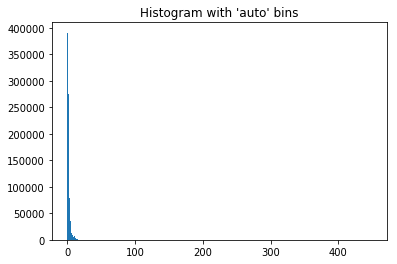

In [17]:
b = list(range(0, 450))

plt.hist(df["tip_amount"], bins=b)  
plt.title("Histogram ")
plt.show()

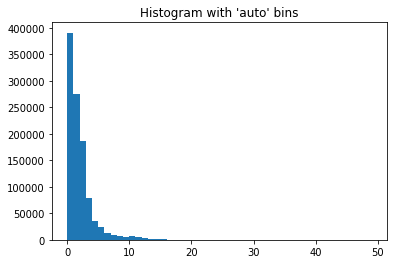

In [18]:
b = list(range(0, 50))

plt.hist(df["tip_amount"], bins=b)  
plt.title("Histogram with 'auto' bins")
plt.show()

In [20]:
tip_small = df[df["tip_amount"] <=10]

In [21]:
tip_big = df[df["tip_amount"] >10]

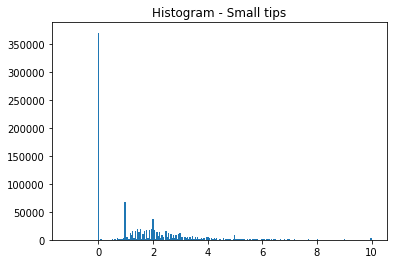

In [25]:
plt.hist(tip_small["tip_amount"], bins='auto')  
plt.title("Histogram - Small tips")
plt.show()

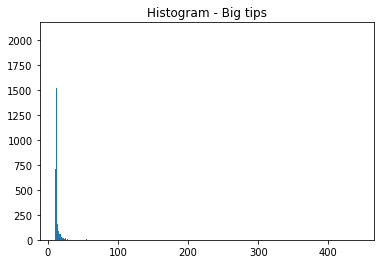

In [26]:
plt.hist(tip_big["tip_amount"], bins='auto')  
plt.title("Histogram - Big tips")
plt.show()

In [111]:
cols = list(df.columns.values)

In [112]:
cols

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'LocationID_drop',
 'Borough_drop',
 'Zone_drop',
 'service_zone_drop',
 'LocationID_pick',
 'Borough_pick',
 'Zone_pick',
 'service_zone_pick',
 'TimeStamp_Pick',
 'TimeStamp_Drop',
 'trip_duration',
 'weekday_pick',
 'hour_pick']

In [42]:
#df = df[['mean', '0', '1', '2', '3']]

#df = df[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
# 'RatecodeID', 'store_and_fwd_flag',  'PULocationID', 'DOLocationID',
## 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'LocationID_drop',
 #'Borough_drop', 'Zone_drop', 'service_zone_drop', 'LocationID_pick', 'Borough_pick',
# 'Zone_pick', 'service_zone_pick',        'tip_amount', 'total_amount'      ]]

In [146]:
df2 = df[['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
#  'Borough_drop',
#  'Zone_drop',
#  'service_zone_drop',
#  'Borough_pick',
#  'Zone_pick',
#  'service_zone_pick',
 'trip_duration',
 'weekday_pick',
 'hour_pick',
 'total_amount']]

In [142]:
df2.to_csv("b.csv")

In [150]:
# dummy = pd.get_dummies(df2['Borough_drop'])
# df2 =pd.concat([df2, dummy], axis=1) 
# dummy = pd.get_dummies(df2['Zone_drop'])
# df2 =pd.concat([df2,dummy],axis=1)
# dummy = pd.get_dummies(df2['service_zone_drop'])
# df2 =pd.concat([df2, dummy], axis=1) 

dummy = pd.get_dummies(df2['weekday_pick'])
df2 =pd.concat([df2, dummy], axis=1) 
dummy = pd.get_dummies(df2['hour_pick'])
df2 =pd.concat([df2,dummy],axis=1)

In [147]:
df2['tip_per'] = df2['tip_amount']/df2['total_amount'] 

C:\Users\atika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [151]:
len(df2.columns)

41

In [127]:
cols = list(df.columns.values)

In [208]:
df2.dtypes

passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
trip_duration              int64
weekday_pick              object
hour_pick                  int64
total_amount             float64
tip_per                  float64
Friday                     uint8
Saturday                   uint8
Sunday                     uint8
Thursday                   uint8
0                          uint8
1                          uint8
2                          uint8
3                          uint8
4                          uint8
5                          uint8
6                          uint8
7                          uint8
8                          uint8
9                          uint8
10                         uint8
11                         uint8
12                         uint8
13        

In [209]:
cols=list(df2.columns)
cols

['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'trip_duration',
 'weekday_pick',
 'hour_pick',
 'total_amount',
 'tip_per',
 'Friday',
 'Saturday',
 'Sunday',
 'Thursday',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [210]:
cols.remove('total_amount')
cols.remove('weekday_pick')
cols.remove('hour_pick')

In [211]:
cols

['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'trip_duration',
 'tip_per',
 'Friday',
 'Saturday',
 'Sunday',
 'Thursday',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [212]:
df3 = df2.loc[:,cols]

In [213]:
df3.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,trip_duration,tip_per,...,14,15,16,17,18,19,20,21,22,23
0,6.0,1.03,7.5,1.0,0.5,1.86,0.0,0.3,540,0.166667,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.70,9.0,1.0,0.5,2.15,0.0,0.3,660,0.166023,...,0,0,0,1,0,0,0,0,0,0
2,1.0,1.30,7.5,1.0,0.5,1.85,0.0,0.3,540,0.165919,...,0,0,0,0,1,0,0,0,0,0
3,2.0,1.40,9.0,1.0,0.5,0.00,0.0,0.3,660,0.000000,...,0,0,0,0,1,0,0,0,0,0
4,1.0,2.30,11.5,1.0,0.5,0.00,0.0,0.3,900,0.000000,...,0,0,0,0,1,0,0,0,0,0


In [214]:
#re order
df3 = df3[['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'trip_duration',
  'Friday',
 'Saturday',
 'Sunday',
 'Thursday',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
  'tip_per']]

In [215]:
df3.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,trip_duration,Friday,...,15,16,17,18,19,20,21,22,23,tip_per
0,6.0,1.03,7.5,1.0,0.5,1.86,0.0,0.3,540,0,...,0,0,0,0,0,0,0,0,0,0.166667
1,1.0,1.70,9.0,1.0,0.5,2.15,0.0,0.3,660,1,...,0,0,1,0,0,0,0,0,0,0.166023
2,1.0,1.30,7.5,1.0,0.5,1.85,0.0,0.3,540,1,...,0,0,0,1,0,0,0,0,0,0.165919
3,2.0,1.40,9.0,1.0,0.5,0.00,0.0,0.3,660,1,...,0,0,0,1,0,0,0,0,0,0.000000
4,1.0,2.30,11.5,1.0,0.5,0.00,0.0,0.3,900,1,...,0,0,0,1,0,0,0,0,0,0.000000


In [216]:
 df3 = df3.astype('float64', copy=False)

In [217]:
df3.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,trip_duration,Friday,...,15,16,17,18,19,20,21,22,23,tip_per
0,6.0,1.03,7.5,1.0,0.5,1.86,0.0,0.3,540.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667
1,1.0,1.70,9.0,1.0,0.5,2.15,0.0,0.3,660.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166023
2,1.0,1.30,7.5,1.0,0.5,1.85,0.0,0.3,540.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.165919
3,2.0,1.40,9.0,1.0,0.5,0.00,0.0,0.3,660.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,1.0,2.30,11.5,1.0,0.5,0.00,0.0,0.3,900.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [218]:
df3 = df3.replace([np.inf, -np.inf, np.nan], 0).dropna(axis=1)

In [219]:
df3.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,trip_duration,Friday,...,15,16,17,18,19,20,21,22,23,tip_per
0,6.0,1.03,7.5,1.0,0.5,1.86,0.0,0.3,540.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667
1,1.0,1.70,9.0,1.0,0.5,2.15,0.0,0.3,660.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166023
2,1.0,1.30,7.5,1.0,0.5,1.85,0.0,0.3,540.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.165919
3,2.0,1.40,9.0,1.0,0.5,0.00,0.0,0.3,660.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,1.0,2.30,11.5,1.0,0.5,0.00,0.0,0.3,900.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [207]:
df3.dtypes

passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
trip_duration            float64
Friday                   float64
Saturday                 float64
Sunday                   float64
Thursday                 float64
0                        float64
1                        float64
2                        float64
3                        float64
4                        float64
5                        float64
6                        float64
7                        float64
8                        float64
9                        float64
10                       float64
11                       float64
12                       float64
13                       float64
14                       float64
15                       float64
16                       float64
17        

In [229]:
df3 = df3[1:100000]

In [230]:
X, y = df3.loc[:, df3.columns != 'tip_per'].values , df3['tip_per'].values

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 0)

In [232]:
print("\n\n")
from sklearn.ensemble import RandomForestRegressor
feat_labels = df3.columns[:37]
forest = RandomForestRegressor(n_estimators=10000, random_state = 0, n_jobs=-1)
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [233]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print("\n")
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1,30, feat_labels[f], importances[indices[f]]))



 1) passenger_count                0.940520
 2) trip_distance                  0.055222
 3) fare_amount                    0.001325
 4) extra                          0.001076
 5) mta_tax                        0.000816
 6) tip_amount                     0.000134
 7) tolls_amount                   0.000093
 8) improvement_surcharge          0.000078
 9) trip_duration                  0.000068
10) Friday                         0.000062
11) Saturday                       0.000062
12) Sunday                         0.000045
13) Thursday                       0.000041
14) 0                              0.000040
15) 1                              0.000037
16) 2                              0.000035
17) 3                              0.000034
18) 4                              0.000034
19) 5                              0.000033
20) 6                              0.000026
21) 7                              0.000026
22) 8                              0.000023
23) 9                         